In [23]:
import yaml
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ray import tune

In [24]:
# # Read ray tune experiment results
# experiment_name = "umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_30.60.90...300"
# path = os.path.join("../ray_results", experiment_name)
# restored_tuner = tune.Tuner.restore(experiment_name, trainable=None)
# result_grid = restored_tuner.get_results()
# results_df = pd.DataFrame(result_grid)
# results_df

In [25]:
# data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_30.60.90...300/data.csv')
data = pd.read_csv('experiments/test_convtae_1/data.csv')
data = pd.read_csv('experiments/test_convtae_1_repeated/data.csv')
# data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_200/results/data.csv')

# data

,Unnamed: 0,score,time_this_iter_s,done,training_iteration,trial_id,date,timestamp,time_total_s,pid,...,node_ip,time_since_restore,iterations_since_restore,config/latent_dim,config/model_lamda,config/num_CL,config/num_HL,config/size_CL,config/size_HL,logdir
0,0,0.493427,123.508518,False,1,7af96315,2023-09-08_14-02-32,1694181752,123.508518,22306,...,172.17.0.2,123.508518,1,276,0.060073,2,7,23,81,/home/darlinne.soto/ray_results/test_convtae_1...
1,1,0.418310,229.857650,True,1,d3e00531,2023-09-08_14-04-28,1694181868,229.857650,26462,...,172.17.0.2,229.857650,1,100,0.394300,4,6,15,86,/home/darlinne.soto/ray_results/test_convtae_1...
2,2,0.495540,129.200378,False,1,6c6f25db,2023-09-08_14-02-58,1694181778,129.200378,26586,...,172.17.0.2,129.200378,1,329,1.717441,7,8,8,29,/home/darlinne.soto/ray_results/test_convtae_1...
3,3,0.411268,178.600317,True,1,facb4525,2023-09-08_14-03-58,1694181838,178.600317,26706,...,172.17.0.2,178.600317,1,182,1.010107,2,6,26,148,/home/darlinne.soto/ray_results/test_convtae_1...
4,4,0.398826,321.222431,True,1,162efcbc,2023-09-08_14-06-31,1694181991,321.222431,26828,...,172.17.0.2,321.222431,1,274,1.084431,8,6,4,35,/home/darlinne.soto/ray_results/test_convtae_1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,890,0.442254,345.036371,True,1,504204ba,2023-09-09_01-58-10,1694224690,345.036371,26828,...,172.17.0.2,345.036371,1,135,1.674714,8,2,14,143,/home/darlinne.soto/ray_results/test_convtae_1...
891,891,0.671362,329.342138,False,1,3f209a2d,2023-09-09_01-58-46,1694224726,329.342138,26462,...,172.17.0.2,329.342138,1,182,1.774095,6,5,16,91,/home/darlinne.soto/ray_results/test_convtae_1...
892,892,0.492723,303.808283,True,1,1d6b4d6e,2023-09-09_01-58-51,1694224731,303.808283,22306,...,172.17.0.2,303.808283,1,59,1.578833,7,2,17,106,/home/darlinne.soto/ray_results/test_convtae_1...
893,893,0.566901,321.232841,True,1,d87df3da,2023-09-09_01-59-30,1694224770,321.232841,27773,...,172.17.0.2,321.232841,1,96,1.260241,5,6,12,121,/home/darlinne.soto/ray_results/test_convtae_1...


In [26]:
# data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_200/results/data.csv')
# data

<Axes: >

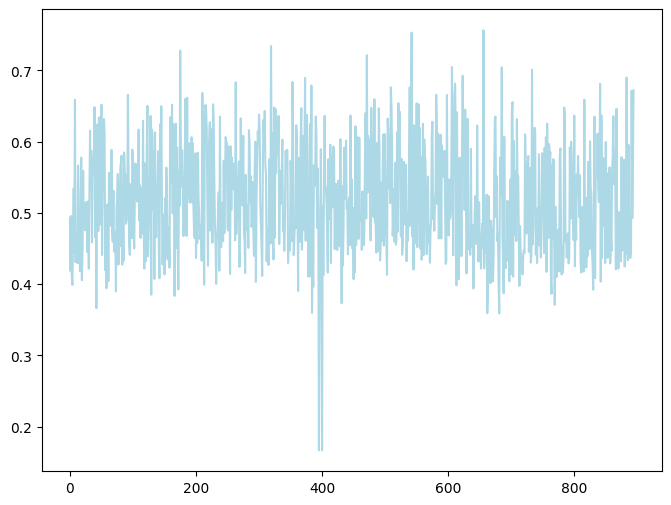

In [27]:
data['score'].plot(color='lightblue', figsize=(8, 6))

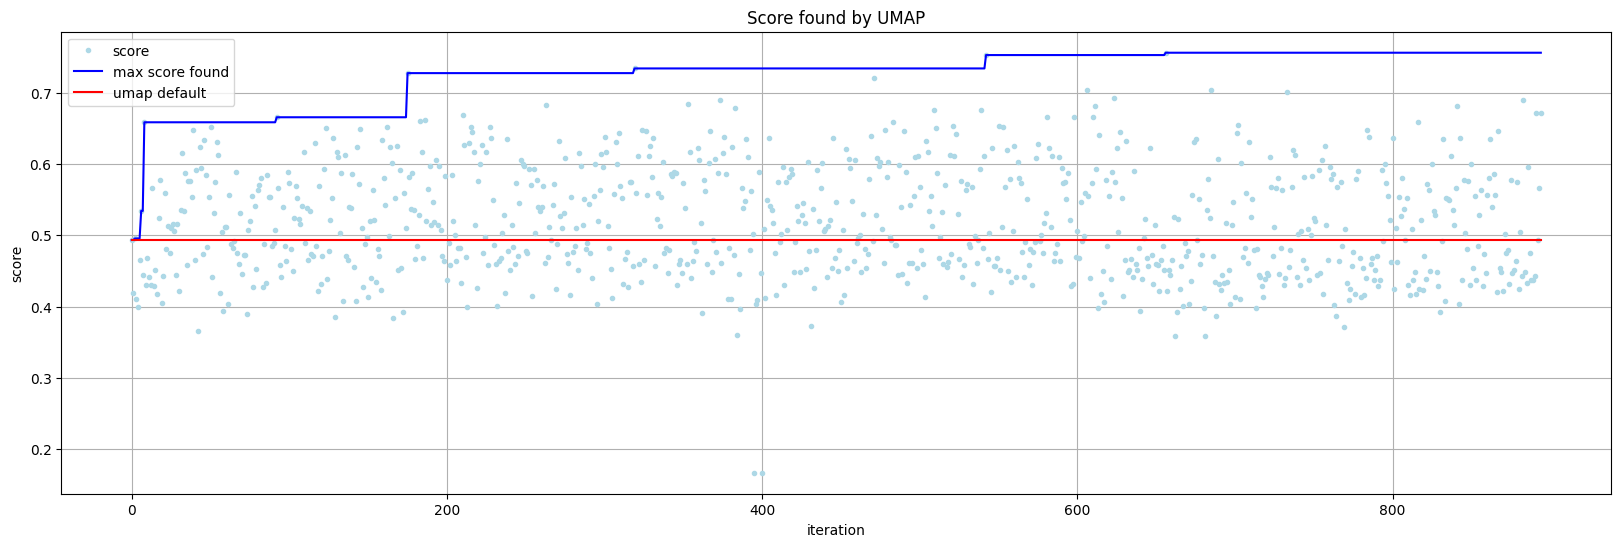

In [28]:
score1 = data.loc[0,'score']
data['score'].plot(color='lightblue', figsize=(20, 6), style='.')
data.cummax()['score'].plot(legend=True, label='max score found', color='blue')
plt.plot(list(range(len(data))), [score1]*len(data), color='red', label='umap default')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('score')
plt.title('Score found by UMAP')
plt.grid()
# plt.show()


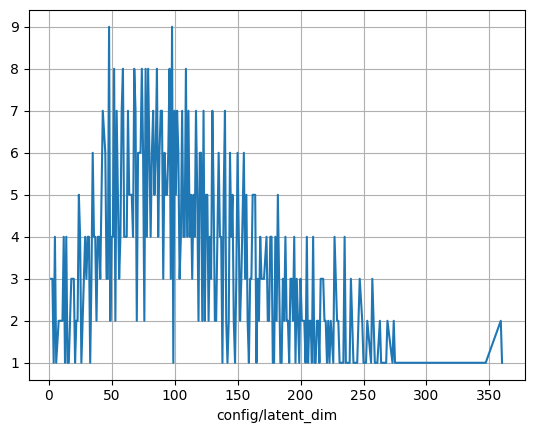

In [29]:
data.groupby('config/latent_dim').count()['score'].plot()
plt.grid()

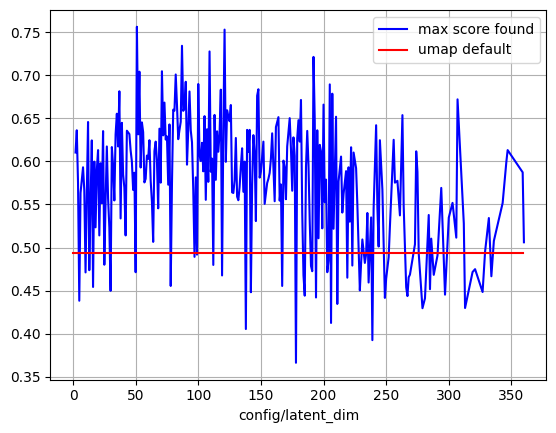

In [30]:
data.groupby('config/latent_dim').max()['score'].plot(legend=True, label='max score found', color='blue')
plt.plot(list(range(360)), [score1]*360, color='red', label='umap default')
plt.legend()
plt.grid()

<Axes: title={'center': 'score'}, xlabel='config/latent_dim'>

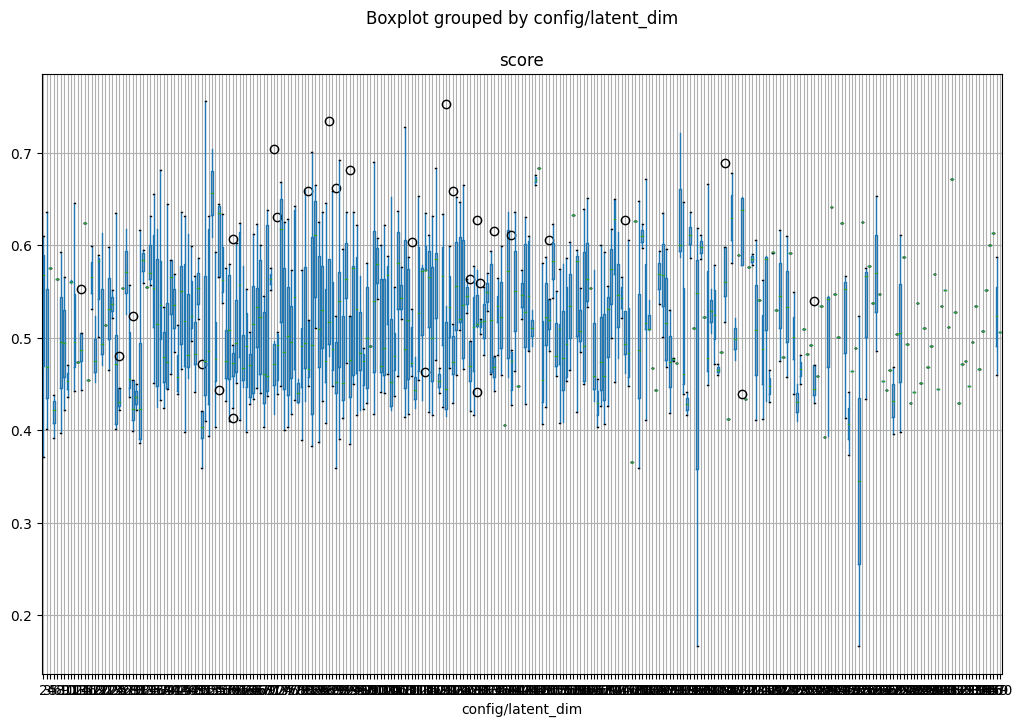

In [31]:
# data.groupby('config/umap_ncomp').boxplot(column='score')

# data.groupby('config/umap_spread').boxplot(column='score', by='config/umap_spread')

data.boxplot(column='score', by='config/latent_dim', figsize=(12,8))
# category = pd.cut(data['config/umap_ncomp'], bins=5, labels=['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])
# print(category)
# data.boxplot(column='score', by=category, figsize=(12,8))
# plt.boxplot(data['score'])
# data.boxplot(column='score', by='config/umap_ncomp', figsize=(40,10))

| Trial name            | status     | loc               |   umap_mdist |   umap_neigh |   umap_spread |   iter |   total time (s) |    score |
| objective_7f36f_00006 | TERMINATED | 172.17.0.12:15622 |    0.926511  |           36 |            27 |      1 |          25.2358 | 0.416667 |

In [32]:
# | Trial name            | status     | loc               |   umap_mdist |   umap_neigh |   umap_spread |   iter |   total time (s) |    score |
# | objective_7f36f_00006 | TERMINATED | 172.17.0.12:15622 |    0.926511  |           36 |            27 |      1 |          25.2358 | 0.416667 |

In [33]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# dims, scores, max_scores = read_and_create_graph("results_kuhar_std0.01_top5/results_for_kuhar_all_dim.yaml")
# ax.plot(dims, scores, label='Accuracy', linewidth=1.0, color='gray')
# ax.plot(dims, max_scores, label='Max Accuracy', linewidth=1.5, color='blue', linestyle='--')
# ax.grid()
# ax.set_title('Dimensionality vs. Accuracy - KH standartized_balanced')
# ax.set_xlabel('Dimensionality')
# ax.set_ylabel('Accuracy')
# ax.legend()
# ax.set_ylim(0.0, 1.0)